In [1]:
%matplotlib inline

In [35]:
import numpy as np

In [2]:
import pylab as pl
pl.rcParams['figure.figsize'] = (16,8)

In [15]:
import sys
sys.path.append('/lustre/naasc/users/aginsbur/repos/reduction/reduction/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show

In [16]:
imgs_before_b6, cubes_before_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0')
imgs_after_b6, cubes_after_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal1')

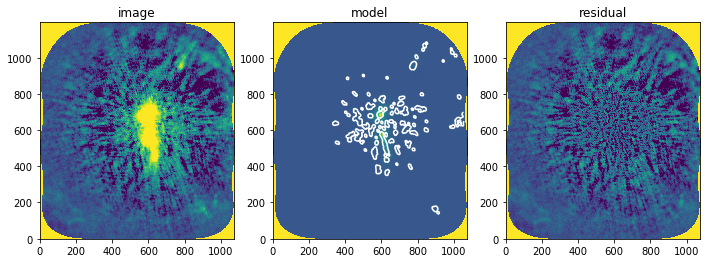

In [5]:
show(imgs_before_b6, vmin=-0.001, vmax=0.01)

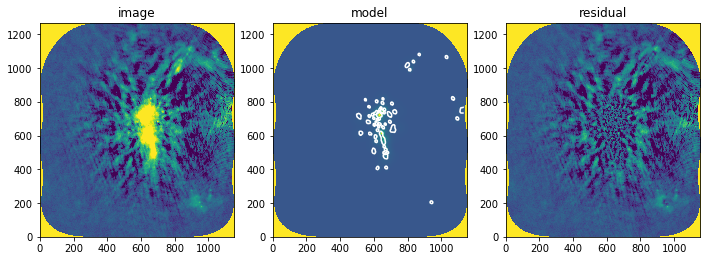

In [6]:
show(imgs_after_b6, vmin=-0.001, vmax=0.01)

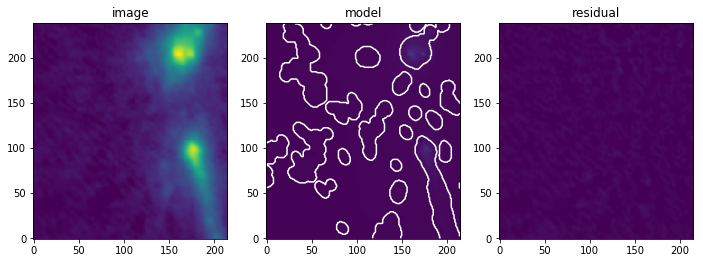

In [23]:
show(imgs_before_b6, vmin=-0.001, vmax=0.3, zoom=0.2)

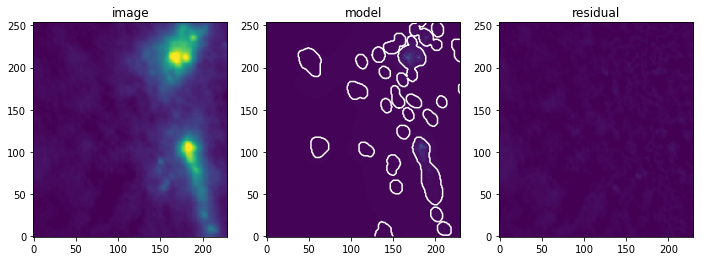

In [24]:
show(imgs_after_b6, vmin=-0.001, vmax=0.3, zoom=0.2)

In [9]:
imgs_before_b3, cubes_before_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0')
imgs_after_b3, cubes_after_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal1')

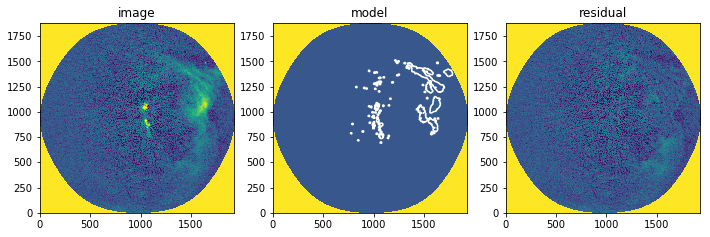

In [10]:
show(imgs_before_b3, vmin=-0.001, vmax=0.01)

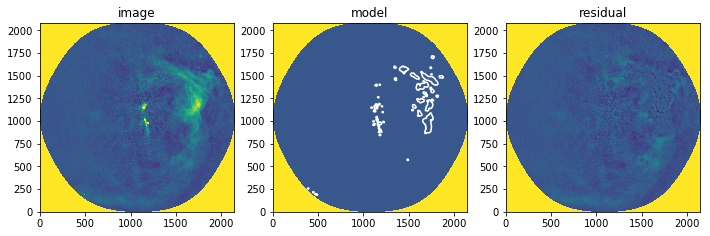

In [11]:
show(imgs_after_b3, vmin=-0.001, vmax=0.01)

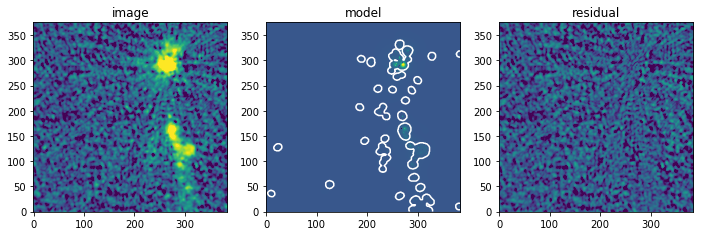

In [26]:
show(imgs_before_b3, vmin=-0.001, vmax=0.01, zoom=0.2)

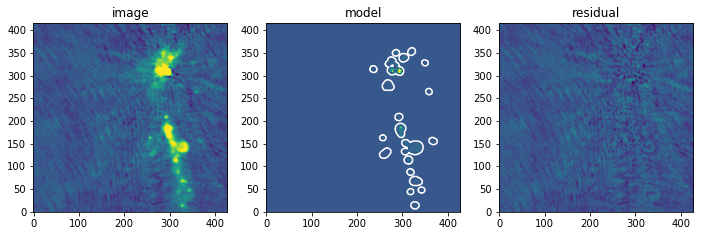

In [25]:
show(imgs_after_b3, vmin=-0.001, vmax=0.01, zoom=0.2)

Examine the phases: this uses `casatools` (which is only available as a beta library from an NRAO site) to load the table and plot some simple phase information.

In [29]:
import casatools
tb = casatools.table()

class CasaTable(object):
    def __init__(self, file_name):
        self.tb = tb
        self.file_obj = tb.open(file_name)
    def __enter__(self):
        return self.tb
    def __exit__(self, type, value, traceback):
        self.tb.close()

In [36]:
with CasaTable('../W51-E_B6_uid___A001_X1296_X215_continuum_merged_phase1_int.cal') as tb:
    print(tb.colnames())
    data = tb.getcol('CPARAM')
    time = tb.getcol('TIME')
    antenna1 = tb.getcol('ANTENNA1')
    antenna2 = tb.getcol('ANTENNA2')
    obsid = tb.getcol('OBSERVATION_ID')

['TIME', 'FIELD_ID', 'SPECTRAL_WINDOW_ID', 'ANTENNA1', 'ANTENNA2', 'INTERVAL', 'SCAN_NUMBER', 'OBSERVATION_ID', 'CPARAM', 'PARAMERR', 'FLAG', 'SNR', 'WEIGHT']


In [43]:
angle = np.angle(data) * 180/np.pi

Plot the phase angle correction from the calibration table vs. entry number.  This allows us to see the typical phase correction split by observation ID rather than by time, since it's very hard to see anything in the angle vs. time plot when multiple independent observations are involved.

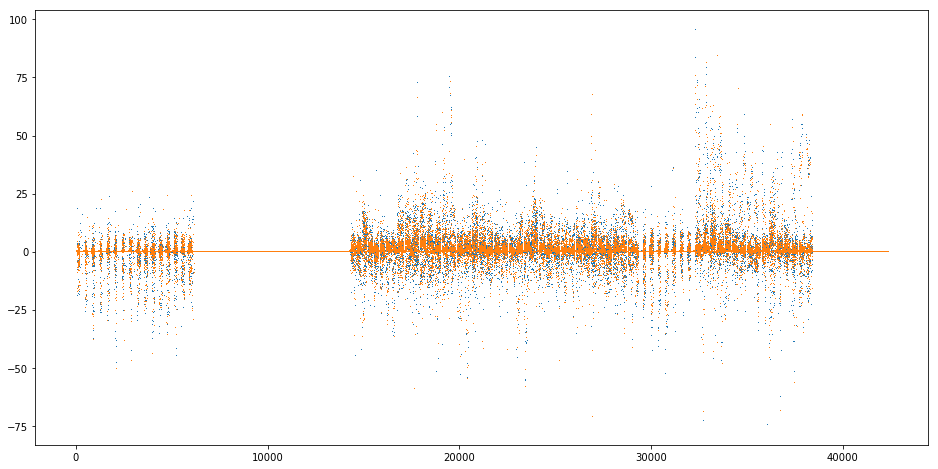

In [44]:
pl.plot(angle[:,0,antenna1 == 0].T, marker=',', linestyle='none')

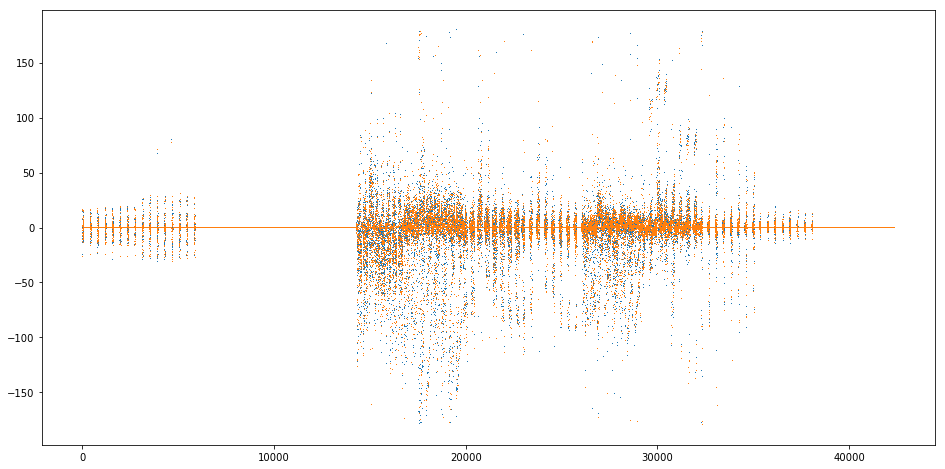

In [45]:
pl.plot(angle[:,0,antenna1 == 2].T, marker=',', linestyle='none')